In [23]:
import dataUtils as du


In [24]:
imgs = du.load_images_from_gcs(bucket_name="med-img-net",num_images=10)

/Users/wanglan/Documents/clean-MedImgNet/kobenet/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
Loading images: 9image [00:01,  4.98image/s]

Total images loaded: 10


In [35]:
img = imgs[6]

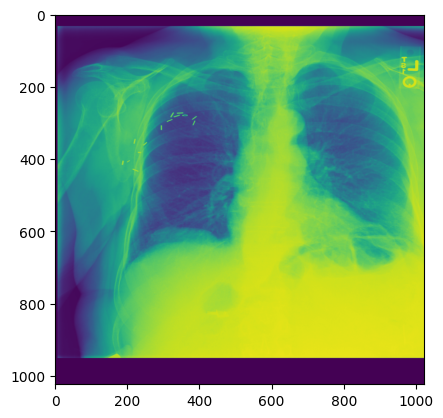

In [36]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [37]:
from modelUtils import Classifier
import torch

In [38]:
classifier = Classifier()
classifier.load_state_dict(torch.load("results/model.pth", map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))



<All keys matched successfully>

In [39]:
from torchvision import transforms

In [40]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

In [41]:
from PIL import Image
import numpy as np
img = Image.fromarray(img) if isinstance(img, np.ndarray) else img


In [42]:
img = transform(img).unsqueeze(0)

In [43]:
        # self.label_map = {
        #     'Atelectasis': 0,
        #     'Cardiomegaly': 1,
        #     'Effusion': 2,
        #     'Infiltration': 3,
        #     'Mass': 4,
        #     'Nodule': 5,
        #     'Pneumonia': 6
        #     'Pneumothorax': 7,
        #     'Consolidation': 8,
        #     'Edema': 9,
        #     'Emphysema': 10,
        #     'Fibrosis': 11,
        #     'Pleural_Thickening': 12,
        #     'Hernia': 13,
        #     "No Finding": 14
        # }
classifier.eval()
with torch.no_grad():
    out = classifier(img)
    print(out)
    print(torch.sigmoid(out)>0.5)


tensor([[ -9.2484, -17.7605, -10.9426,   0.2759, -12.5515,  -4.8674, -26.4251,
          -8.3821,  -7.8076, -16.7474, -25.7808, -26.6025, -10.1558, -29.8098,
           2.1902]])
tensor([[False, False, False,  True, False, False, False, False, False, False,
         False, False, False, False,  True]])


In [44]:
for i in range(1000):
    img, label = dataset[i]
    if img.shape[0]!=1:

        print(img.shape, label)
        print(i)
        

NameError: name 'dataset' is not defined

torch.Size([4, 256, 256])


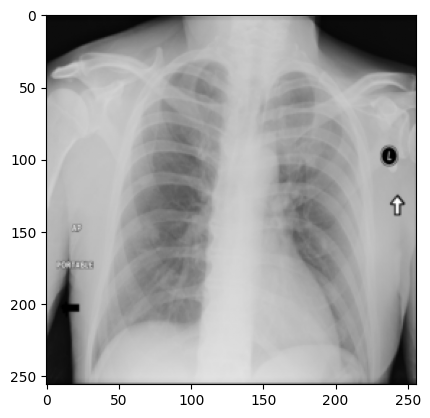

In [ ]:
img,_ =dataset[12]
plt.imshow(img[0],cmap='gray')
print(img.shape)

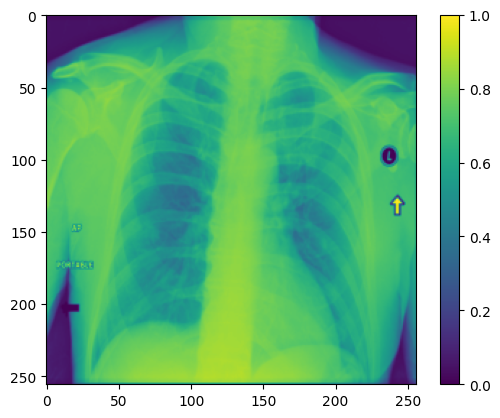

In [ ]:
# Extract the first channel (index 0)
first_channel = img[0, :, :]
scond_channel = img[1, :, :]
third_channel = img[2, :, :]
fouth_channel = img[3, :, :]
# Display the first channel

plt.imshow(third_channel)  # Grayscale image
plt.colorbar()  # Show the color scale
plt.show()

tensor(0.)

In [ ]:
dataset[112119][0].shape

torch.Size([4, 256, 256])

In [ ]:
dataset[7][1]

tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

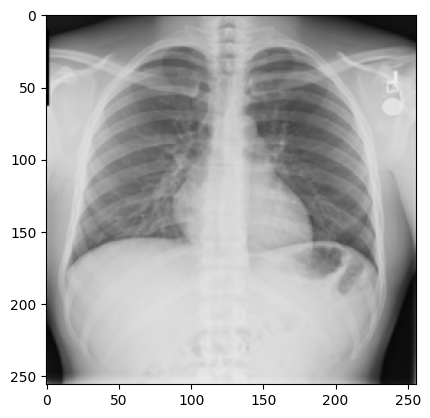

In [ ]:
plt.imshow(dataset[112119][0].permute(1, 2, 0))

In [ ]:
dataloader = DataLoader(dataset[4], batch_size=2, shuffle=True)